Implement K-Means clustering/ hierarchical clustering on sales_data_sample.csv dataset. Determine the number of clusters using the elbow method.

In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [150]:
df = pd.read_csv("sales_data_sample.csv", encoding='latin1')

In [151]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [152]:
df.shape

(2823, 25)

In [153]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [154]:
df.drop(['ADDRESSLINE1', 'ADDRESSLINE2','STATUS' ,'STATE', 'TERRITORY', 'POSTALCODE', 'CITY','CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'CUSTOMERNAME', 'ORDERNUMBER', 'PHONE', 'ORDERDATE'], axis = 1, inplace=True)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2823 non-null   int64  
 1   PRICEEACH        2823 non-null   float64
 2   ORDERLINENUMBER  2823 non-null   int64  
 3   SALES            2823 non-null   float64
 4   QTR_ID           2823 non-null   int64  
 5   MONTH_ID         2823 non-null   int64  
 6   YEAR_ID          2823 non-null   int64  
 7   PRODUCTLINE      2823 non-null   object 
 8   MSRP             2823 non-null   int64  
 9   PRODUCTCODE      2823 non-null   object 
 10  COUNTRY          2823 non-null   object 
 11  DEALSIZE         2823 non-null   object 
dtypes: float64(2), int64(6), object(4)
memory usage: 264.8+ KB


### Checking columns unique values


In [156]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}")
    print()

QUANTITYORDERED: [30 34 41 45 49 36 29 48 22 37 23 28 46 42 20 21 24 66 26 38 47 35 32 40
 50 39 27 44 31 33 43 56 25 64 19 12 55 10 54 97 61 51 59 76  6 15 60 65
 58 16 70 13 18 52 11 62 85 77]

PRICEEACH: [95.7  81.35 94.74 ... 55.69 97.16 62.24]

ORDERLINENUMBER: [ 2  5  6 14  1  9  7 13 12  4 11  8  3 10 17 16 15 18]

SALES: [2871.   2765.9  3884.34 ... 3978.51 5417.57 2116.16]

QTR_ID: [1 2 3 4]

MONTH_ID: [ 2  5  7  8 10 11 12  1  4  6  9  3]

YEAR_ID: [2003 2004 2005]

PRODUCTLINE: ['Motorcycles' 'Classic Cars' 'Trucks and Buses' 'Vintage Cars' 'Planes'
 'Ships' 'Trains']

MSRP: [ 95 214 118 193 136 147 194 207 150 151 117 173  79 115 116 141 102  53
 124 157 170  77 142 163  60 122 127  84 168 132 101  62  86 104 169 100
  80  99 146 105 143  92  87 121  50 148  71  73  57 112 109  33  76  44
  69  90  35  68  37  88  85  61  65 107  83 140  41  97  72  96  40  54
  64  43  58  81  66  91  74  49]

PRODUCTCODE: ['S10_1678' 'S10_1949' 'S10_2016' 'S10_4698' 'S10_4757' 'S10_4962'


### One Hot Encoding

In [157]:
df.shape

(2823, 12)

In [158]:
from sklearn.preprocessing import OneHotEncoder

In [159]:
cat_cols = ['PRODUCTLINE', 'PRODUCTCODE', 'COUNTRY', 'DEALSIZE']

In [160]:
ohe = OneHotEncoder(sparse_output=False)

In [161]:
encoded_array = ohe.fit_transform(df[cat_cols])

In [162]:
# Convert to datafram
encoded_df = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out(cat_cols))


In [163]:
encoded_df

,PRODUCTLINE_Classic Cars,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars,PRODUCTCODE_S10_1678,PRODUCTCODE_S10_1949,PRODUCTCODE_S10_2016,...,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA,DEALSIZE_Large,DEALSIZE_Medium,DEALSIZE_Small
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2819,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2820,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2821,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [164]:
# Drop Original Column
df.drop(cat_cols, inplace=True, axis=1)

In [165]:
# Combine
df = pd.concat([df, encoded_df], axis=1)

In [166]:
df.reset_index(drop=True)

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTLINE_Classic Cars,PRODUCTLINE_Motorcycles,...,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA,DEALSIZE_Large,DEALSIZE_Medium,DEALSIZE_Small
0,30,95.70,2,2871.00,1,2,2003,95,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,34,81.35,5,2765.90,2,5,2003,95,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,41,94.74,2,3884.34,3,7,2003,95,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,45,83.26,6,3746.70,3,8,2003,95,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,49,100.00,14,5205.27,4,10,2003,95,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,4,12,2004,54,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2819,29,100.00,1,3978.51,1,1,2005,54,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2820,43,100.00,4,5417.57,1,3,2005,54,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2821,34,62.24,1,2116.16,1,3,2005,54,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Standard Scaler

In [167]:
from sklearn.preprocessing import StandardScaler

In [168]:
scale = StandardScaler()

In [169]:
df_scaled = scale.fit_transform(df)

### Apply PCA

In [170]:
from sklearn.decomposition import PCA 

In [171]:
pca = PCA(n_components=2)  # keep 95% of variance
df_pca = pca.fit_transform(df_scaled)

### K means and Elbow Method

In [172]:
from sklearn.cluster import KMeans

In [173]:
# Elbow Method
inertia = []

In [174]:
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

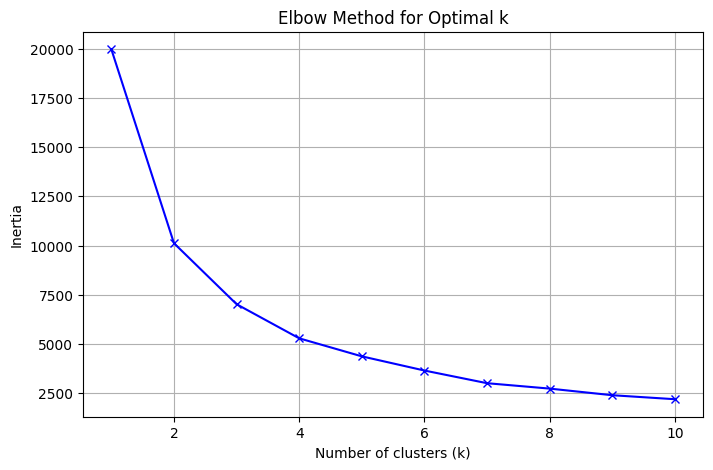

In [175]:
plt.figure(figsize=(8,5))
plt.plot(range(1,11), inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()
